In [1]:
import numpy as np

# Quelques opérations matricielles

**Question** Créer une matrice la matrice `A` suivante avec `arange` et `reshape`

    array([[0, 1],
           [2, 3],
           [4, 5],
           [6, 7],
           [8, 9]])

In [32]:
A = np.arange(10).reshape((5,2))

In [33]:
A

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

**Question** Calculer `A + A` , `A*2`, `A**2`. 

In [34]:
A+A

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14],
       [16, 18]])

In [35]:
A*2

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14],
       [16, 18]])

In [36]:
A**2

array([[ 0,  1],
       [ 4,  9],
       [16, 25],
       [36, 49],
       [64, 81]])

**Question** Décrivez les opérations réalisées. 

Ce sont des opérations qui réalisent l'addition, la multiplication ou la puissance, composante par composante.

## Premiers exemples de broadcast

**Question** Créer un array numpy `v1t` d'une ligne contenant 1 et 2. 

In [40]:
v1t = np.array([1, 2])

In [41]:
v1t

array([1, 2])

**Question** Calculer `A+v1t`, que constatez-vous ? 

In [42]:
A+v1t

array([[ 1,  3],
       [ 3,  5],
       [ 5,  7],
       [ 7,  9],
       [ 9, 11]])

La ligne (1,2) a été ajoutée à toutes les lignes de la matrice A.

**Question** Créer une matrice `v2` de 5 lignes 1 colonne contenant les nombres de 0 à 4.

In [43]:
v2 = np.arange(5).reshape((5,1))
v2

array([[0],
       [1],
       [2],
       [3],
       [4]])

**Question** Calculer `A+v2`. Que constatez-vous ? 

In [44]:
A+v2

array([[ 0,  1],
       [ 3,  4],
       [ 6,  7],
       [ 9, 10],
       [12, 13]])

La colonne v2 a été ajoutée à toutes les colonnes de A.

## 1d-arrays, nd-arrays et transposée

**Question** Nommer `v3t` et `v4t` les deux premières colonnes de `A`. 

In [45]:
v3t = A[:,0]
v4t = A[:,1]
v3t,v4t

(array([0, 2, 4, 6, 8]), array([1, 3, 5, 7, 9]))

**Question** Que constatez-vous ? Est-ce une matrice colonne ?

Non, ce sont de simples arrays à 1 dimension.

**Note** L'attribut `T` donne la transposée de la matrice. **Attention** il existe une distinction entre des arrays numpy à n dimension avec n > 1 et les arrays à 1 dimension (nd-arrays et 1d-arrays)

**Question** afficher la transposée de `A` et celle de `v1t` puis celle de `v2`.

In [46]:
A.T

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

In [48]:
v1t.T, v2.T

(array([1, 2]), array([[0, 1, 2, 3, 4]]))

**Question** Que constatez-vous ? 

La transposée d'un 1d-array (vecteur ligne) ne fait pas un nd-array (vecteur colonne).

# Multiplications de matrice

On rappelle que le produit de deux matrices $A$ et $B$ est possible si le nombre de colonnes de $A$ est égal au nombre de lignes de $B$. Si $A$ est de taille $(n,m)$ et $B$ de taille $(m,p)$ alors $C=AB$ est de taille $(n,p)$ et $$C_{i,j} = \sum_{k=1}^m A_{i,k}\times B_{k,j}$$

**Note** le produit de matrice se fait de différentes façons en numpy:

In [49]:
A2 = np.array([[1, 2],[3, 4]])

In [50]:
A@A2, np.dot(A, A2), A.dot(A2)

(array([[ 3,  4],
        [11, 16],
        [19, 28],
        [27, 40],
        [35, 52]]),
 array([[ 3,  4],
        [11, 16],
        [19, 28],
        [27, 40],
        [35, 52]]),
 array([[ 3,  4],
        [11, 16],
        [19, 28],
        [27, 40],
        [35, 52]]))

**Question** Calculer $v_2^\top A$ et $A^\top v_2$

In [51]:
v2.T@A

array([[60, 70]])

In [52]:
A.T@v2

array([[60],
       [70]])

**Note** On peut créer un objet `rs` qui est une instance de `np.random.RandomState` pour initialiser le générateur de nombres aléatoires de numpy avec une graine spécifique. On utilisera `rs` ensuite pour les tirages.

In [103]:
rs = np.random.RandomState(42)

**Question** Faire trois matrices `A`, `B` et `C` de nombres aléatoires entiers entre 0 et 9 de taille 3 par 3.


In [104]:
A = rs.randint(10,size=9).reshape((3,3))
B = rs.randint(10,size=9).reshape((3,3))
C = rs.randint(10,size=9).reshape((3,3))

**Question** Calculer $AB$, $BA$, $A^\top B^\top$, $(BA)^\top$

In [105]:
A@B

array([[ 73,  31, 106],
       [ 94,  33, 121],
       [ 78,  25,  93]])

In [106]:
A.T@B.T

array([[ 50,  60,  42],
       [ 72,  63,  60],
       [104, 102,  86]])

In [107]:
B@A

array([[ 50,  72, 104],
       [ 60,  63, 102],
       [ 42,  60,  86]])

In [108]:
(B@A).T

array([[ 50,  60,  42],
       [ 72,  63,  60],
       [104, 102,  86]])

**Question** reportez les identités et les différences.

$AB \neq BA$ (non commutatif) et $A^\top B^\top = (BA)^\top$

**Question** Calculer $(AB)C$, $A(BC)$, $A(B+C)$, $AB+AC$

In [109]:
(A@B)@C

array([[1213,  352, 1401],
       [1438,  391, 1630],
       [1134,  303, 1274]])

In [110]:
A@(B@C)

array([[1213,  352, 1401],
       [1438,  391, 1630],
       [1134,  303, 1274]])

In [111]:
A@(B+C)

array([[159,  64, 208],
       [186,  91, 248],
       [144,  81, 194]])

In [112]:
A@B + A@C

array([[159,  64, 208],
       [186,  91, 248],
       [144,  81, 194]])

**Question** Reportez les identités remarquées.

$(AB)C = A(BC)$ (associativité), $A(B+C)=AB+AC$ (distributivité)

## Produit scalaire

On rappelle que le produit scalaire de deux vecteurs de dimension $n$ est $$\langle u,v \rangle= \sum_{i=1}^n u_i*v_i=u^\top v$$


**Question** Créer deux 1d-array `v1t` et `v2t` de dimension 4 d'entiers entre -9 et 10 (exclus)

In [148]:
v1t = rs.randint(-9,10,4)
v2t = rs.randint(-9,10,4)

In [149]:
v1t, v2t

(array([-3,  3,  5,  1]), array([-6,  3, -3,  9]))

**Question** Calculer les produits `v1t@v2t`, `v2t@v1t`. Que constatez-vous ? 

In [150]:
v1t@v2t, v2t@v1t

(21, 21)

C'est identique !

**Question** Avec reshape, créez des vecteurs (4 lignes 1 colonne) `v1` et `v2` à partir de `v1t` et `v2t`.

In [151]:
v1 = v1t[:,np.newaxis]
v2 = v2t[:,np.newaxis]
v1, v2

(array([[-3],
        [ 3],
        [ 5],
        [ 1]]),
 array([[-6],
        [ 3],
        [-3],
        [ 9]]))

**Question** Calculez `v1@v2` et `v2@v1` que constatez-vous et pourquoi ? 

On ne peut pas les dimensions ne correspondent pas.

**Question** Calculez maintenant le produit scalaire de `v1` par `v2` en utilisant la transposée comme indiqué ci-dessus. Le résultat est-il un scalaire ? 

In [152]:
v1.T@v2

array([[21]])

Non, le résultat est une matrice!

## Normes

La norme $p$ d'un vecteur $v$ est définie par $$\Vert v \Vert_p=\big(\sum_{i=1}^n |x_i|^p\big)^{\frac{1}{p}}$$
Très souvent on considère la norme 2 par défaut quand $p$ n'est pas précisé et 
$$\Vert v \Vert=\sqrt{\big(\sum_{i=1}^n |x_i|^2\big)}$$
La norme se calcule en numpy par `np.linalg.norm`.  

**Question** Calculer la norme de `v1`.

In [153]:
np.linalg.norm(v1)

6.6332495807108

**Question** Il apparaît clairement en regardant les définitions que $\langle v,v\rangle = \Vert v\Vert^2$. Vérifier cela avec `v1`

In [154]:
np.sqrt(v1t@v1t)

6.6332495807108

**Question** La norme, c'est une peu comme une distance entre deux points extremités des vecteurs et donc vérifie l'inégalité triangulaire : $\Vert u+v\Vert \leq \Vert u\Vert + \Vert v \Vert$. Vérifiez cela avec `v1`et `v2`.

In [155]:
np.linalg.norm(v1+v2), np.linalg.norm(v1) + np.linalg.norm(v2)

(14.866068747318506, 18.252199619333048)

**Question** Regardez la documentation de `np.linalg.norm`et calculer les $p$-normes pour $p=1$ et $p=\infty$ de `v1t` avec `np.linalg.norm` et avec numpy mais sans cette fonction. (`np.Inf` représente $+\infty$)

In [161]:
np.linalg.norm(v1t,1), np.abs(v1t).sum()

(12.0, 12)

In [162]:
np.linalg.norm(v1t,np.Inf), np.max(v1t)

(5.0, 5)

**Question** Calculer les normes 1, $\infty$ et norme de Froebenius pour la matrice $A$

In [172]:
np.linalg.norm(A,1), np.linalg.norm(A,np.Inf), np.linalg.norm(A)

(23.0, 19.0, 17.776388834631177)

In [167]:
A

array([[6, 3, 7],
       [4, 6, 9],
       [2, 6, 7]])

# Résoudre un système

Ces opérations d'algèbre linéaire sont très utiles pour résoudre des systèmes d'équation linéaires que l'on rencontre un peu partout dans beaucoup de sciences... On peut illustrer cela sur un cas simple avant de voir les utilisations en sciences des données. 

On veut résoudre $$\left \{ \begin{array}{ll}x_1 = 3 x_2\\x_1 = -x_2 +3\end{array} \right .$$
Ce sont deux ensembles de points $(x_1,x_2)$ définis par une relation linéaire entre $x_1$ et $x_2$. La conjonction des deux équations est donc l'ensemble des points à l'intersection de ces deux définitions. 
Graphiquement ce sont deux droites dans le plan et la solution est leur intersection. 

**Question** Tracer les deux droites définies par les deux équations 
$$\left \{ \begin{array}{ll}x_1 = 3 x_2\\x_1 = -x_2 +3\end{array} \right .$$ pour $x_2$ entre 0 et 3. Cela doit ressembler à 

![droites](./droites.png)

On peut utiliser `plot` pour tracer les droites et `scatter` pour mettre le point dont on peut essayer de calculer les coordonnées dans un premier temps à la main...

In [173]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
%matplotlib inline

In [174]:
x2 = np.array([0, 3])
x11 = 3*x2
x12 = -x2 + 3

In [175]:
x = np.array([9/4, 3/4])
x

array([2.25, 0.75])

In [176]:
x11, x12

(array([0, 9]), array([3, 0]))

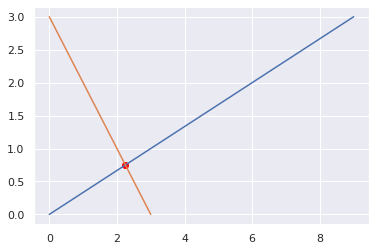

In [177]:
plt.plot(x11, x2)
plt.plot(x12, x2)
plt.scatter(x[0], x[1], c='red')

**Question** Écrire le système $$\left \{ \begin{array}{ll}x_1 = 3 x_2\\x_1 = -x_2 +3\end{array} \right .$$ sous la forme $Ax = b$ où $x$ est un vecteur $(x_1,x_2)$ et créer les matrices $A$ et le vecteur $b$.

In [178]:
A = np.array([[1, -3], [1, 1]])
b = np.array([0, 3]).reshape(2,1)

In [179]:
A

array([[ 1, -3],
       [ 1,  1]])

In [180]:
b

array([[0],
       [3]])

**Question** Calculer $Ax$ pour x qui est le vecteur $(1, 1)^T$

In [181]:
x = np.ones((2,1))
A@x

array([[-2.],
       [ 2.]])

**Question** Calculer l'inverse de $A$ dans `Ainv`  (voir `np.linalg.inv`)

In [182]:
Ainv = np.linalg.inv(A)

**Question** Calculer `Ainv` multiplié par `A`. Quelle est la particularité de ce résultat? 

In [184]:
Ainv@A

array([[0.],
       [3.]])

C'est une matrice identité, $A^{-1}A=I$.

**Question** Calculer $x= A^{-1}b$ et comparer la valeur de $Ax$ et de $b$. 

In [185]:
x = Ainv@b
x

array([[2.25],
       [0.75]])

In [186]:
A@x

array([[0.],
       [3.]])

**Questions** En pensant à comment peuvent être les deux droites, donner deux systèmes pour lesquels il n'y a pas d'intersection ou pour laquelle l'intersection n'est pas réduite à un seul point. Que peut on dire alors de $A^{-1}$ ? 

In [189]:
A2 = np.array([[1, -3], [1, -3]])
b2 = np.array([0, 3]).reshape(2,1)
A3 = np.array([[1, -3], [1, -3]])
b3 = np.array([3, 3]).reshape(2,1)

A2 et A3 sont singulières et ne peuvent pas être inversées. 

**Note**, bien sûr ce qui a été fait ici en dimension 2, peut se faire en très grande dimensions. 